In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hd_data=pd.read_csv('heart.csv')
hd_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# DATA PREPROCESSING

In [3]:
hd_data.shape

(1025, 14)

In [4]:
# Taking care of missing values
hd_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Taking care of missing values
hd_data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Taking care of duplicate values
display(hd_data.drop_duplicates())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [7]:
# Encoding categorical variables
cat_values=[]
cont_values=[]
for columns in hd_data.columns:
    if hd_data[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        cont_values.append(columns)
        

In [8]:
cat_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [9]:
cont_values

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
hd_data['cp'].unique()


array([0, 1, 2, 3], dtype=int64)

In [11]:
hd_data=pd.get_dummies(hd_data,columns=cat_values,drop_first=True)


In [12]:
hd_data.head()


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,52,125,212,168,1.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,53,140,203,155,3.1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,70,145,174,125,2.6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,61,148,203,161,0.0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,62,138,294,106,1.9,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
st=StandardScaler()
hd_data[cont_values]=st.fit_transform(hd_data[cont_values])
hd_data.head()


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


# EXPLORATORY DATA ANALYSIS

Text(0, 0.5, 'counts')

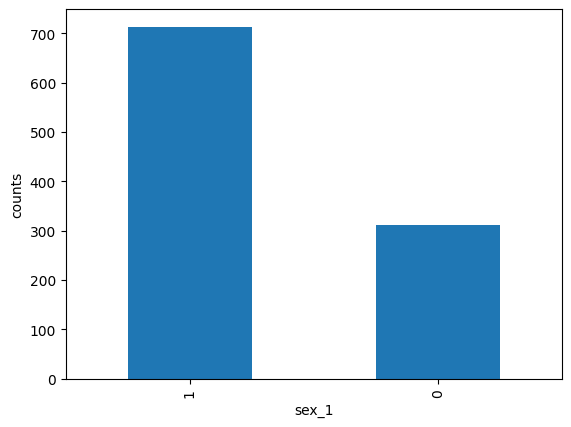

In [16]:
# Which Sex has the most heart disease
hd_data['sex_1'].value_counts().plot.bar()
plt.xlabel('sex_1')
plt.ylabel('counts')


Text(0, 0.5, 'count')

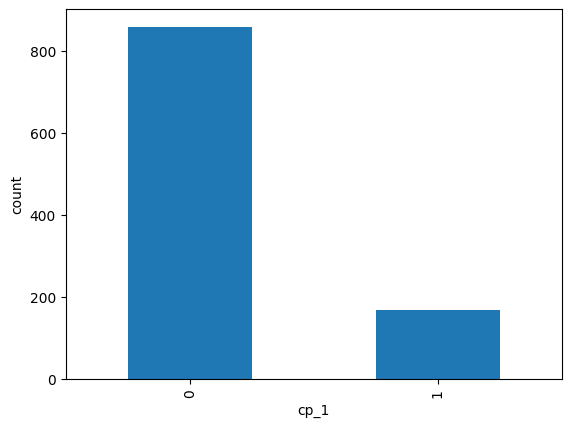

In [17]:
hd_data['cp_1'].value_counts().plot.bar()
plt.xlabel('cp_1')
plt.ylabel('count')


Text(0, 0.5, 'count')

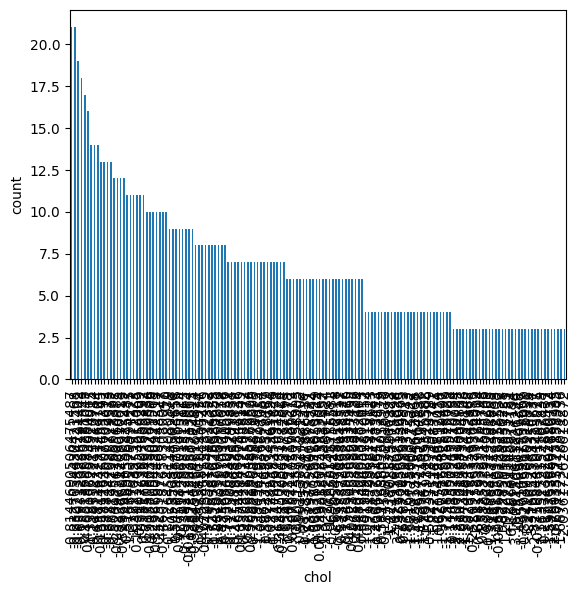

In [18]:
hd_data['chol'].value_counts().plot.bar()
plt.xlabel('chol')
plt.ylabel('count')


<AxesSubplot:xlabel='cp_1', ylabel='count'>

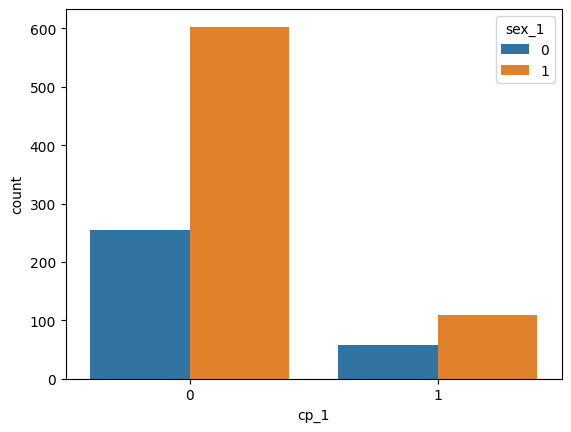

In [19]:
sns.countplot(x=hd_data['cp_1'],hue=hd_data['sex_1'])


<AxesSubplot:xlabel='sex_1', ylabel='Density'>

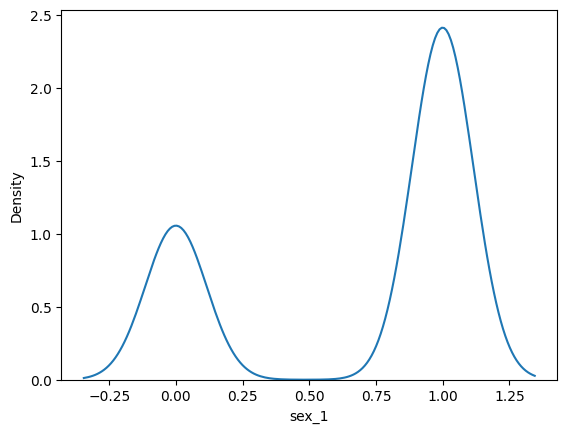

In [20]:
sns.kdeplot(hd_data['sex_1'])


<AxesSubplot:xlabel='age', ylabel='Count'>

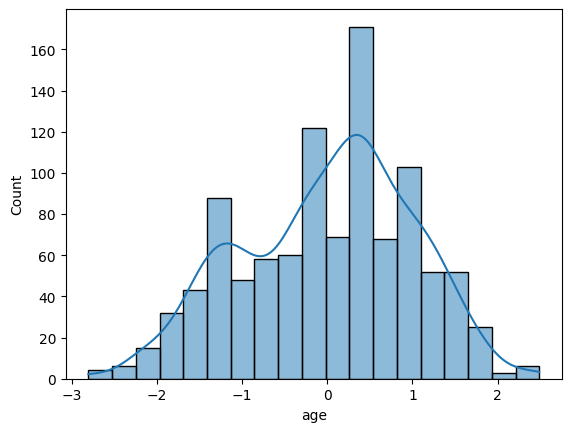

In [21]:
sns.histplot(hd_data['age'],kde='true')


In [22]:
hd_data.corr()


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
age,1.000000,0.271121,0.219823,-0.390227,0.208137,-0.103240,-0.155137,-0.062574,0.049622,0.121243,...,0.173471,-0.191688,0.189677,0.218247,0.162754,-0.130087,0.048565,-0.127881,0.109369,-0.229324
trestbps,0.271121,1.000000,0.127977,-0.039264,0.187434,-0.078974,-0.087992,-0.054250,0.152188,0.181767,...,0.031390,-0.090362,-0.069120,0.095713,0.082236,0.019086,0.076197,-0.139099,0.106942,-0.138772
chol,0.219823,0.127977,1.000000,-0.021772,0.064880,-0.198258,-0.011117,-0.045654,-0.049381,0.026917,...,0.062809,-0.040292,0.018573,0.061398,0.110765,-0.106299,-0.085388,-0.012472,0.064841,-0.099966
thalach,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,-0.049365,0.250678,0.161594,0.099348,-0.008866,...,-0.420784,0.455748,-0.202614,-0.044465,-0.181157,0.068462,-0.148055,0.284543,-0.210261,0.422895
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,0.084687,-0.280812,-0.151284,0.074983,0.010859,...,0.303453,-0.508445,-0.013949,0.223046,0.188517,-0.109960,0.106853,-0.338063,0.297545,-0.438441
sex_1,-0.103240,-0.078974,-0.198258,-0.049365,0.084687,1.000000,-0.035405,-0.106842,0.083960,0.027200,...,-0.013950,-0.009537,0.101220,-0.026489,0.059255,0.088441,0.135659,-0.367115,0.310740,-0.279501
cp_1,-0.155137,-0.087992,-0.011117,0.250678,-0.280812,-0.035405,1.000000,-0.273127,-0.125735,-0.066185,...,-0.198649,0.220526,-0.068957,-0.092725,-0.086896,0.021467,-0.037422,0.203103,-0.182267,0.255288
cp_2,-0.062574,-0.054250,-0.045654,0.161594,-0.151284,-0.106842,-0.273127,1.000000,-0.176438,0.077124,...,-0.102851,0.127121,0.023038,-0.194819,-0.018426,0.099787,-0.087687,0.210853,-0.176206,0.319504
cp_3,0.049622,0.152188,-0.049381,0.099348,0.074983,0.083960,-0.125735,-0.176438,1.000000,0.046805,...,0.020699,-0.046301,-0.062295,0.043190,-0.076566,-0.038103,0.033535,0.015824,-0.028710,0.085054
fbs_1,0.121243,0.181767,0.026917,-0.008866,0.010859,0.027200,-0.066185,0.077124,0.046805,1.000000,...,-0.032623,-0.022019,-0.011455,0.129926,0.073210,0.006528,0.095579,-0.088882,0.026825,-0.041164


<AxesSubplot:>

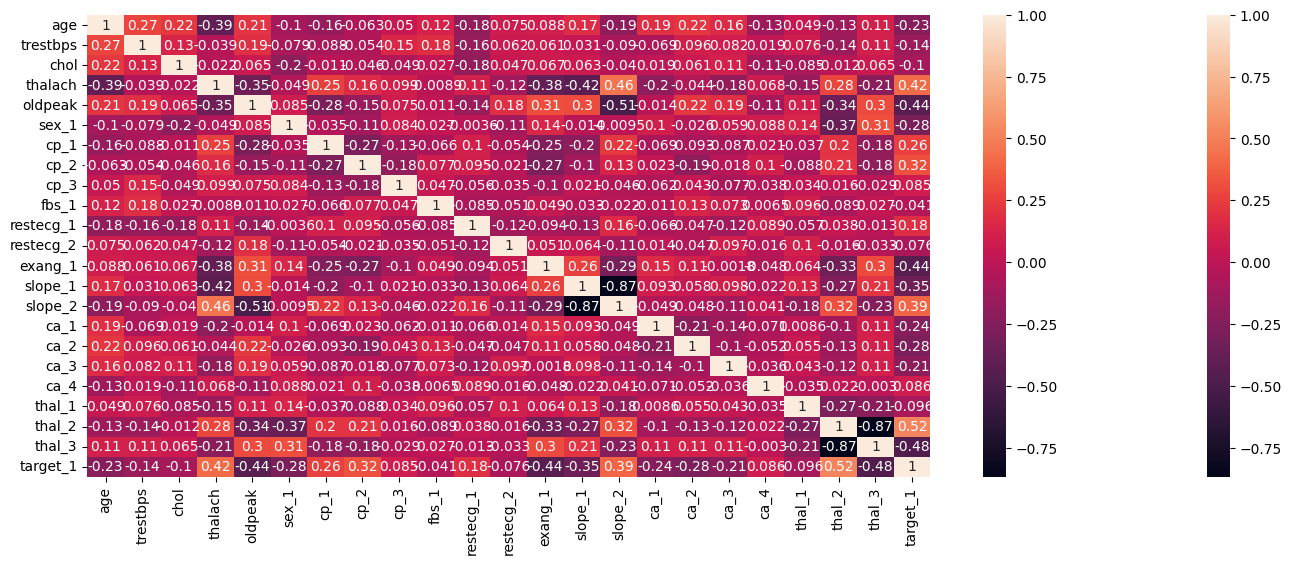

In [23]:
plt.figure(figsize=(17,6))
sns.heatmap(hd_data.corr())
sns.heatmap(hd_data.corr(),annot=True)


# MODEL IMPLEMENTATION

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [25]:
X=hd_data.drop('target_1',axis=1)
Y=hd_data['target_1']


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40)
X_train


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
578,0.834359,0.479107,2.870034,0.342945,0.109400,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
637,0.393241,-0.663216,1.822859,0.995275,-0.912329,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
912,-2.143189,-0.663216,-0.930822,-0.831249,0.449976,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
813,-0.158157,0.479107,-0.833861,0.255968,1.727137,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
34,-0.488996,-0.149171,-0.969606,0.603877,-0.912329,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0.834359,1.050269,-0.038784,0.212479,0.279688,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1016,1.165198,0.364875,0.698116,1.082252,0.279688,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
165,0.503520,2.192593,1.551370,-0.396362,1.982569,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,0.062402,1.621431,0.833861,-0.178919,-0.231177,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [27]:
Y_train

578     1
637     1
912     0
813     0
34      1
       ..
440     0
1016    0
165     0
7       0
219     0
Name: target_1, Length: 820, dtype: uint8

In [28]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
1003,-0.268437,-1.348611,-0.252098,-0.091941,-0.827185,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
758,-0.930114,-1.519959,-0.814469,0.995275,-0.912329,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
498,-0.047877,0.479107,-0.135745,0.473411,0.109400,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
715,1.716595,1.392966,-0.019392,-0.265896,-0.912329,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1008,-1.371232,-0.663216,0.950214,0.560389,-0.912329,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.172682,-0.663216,-1.027782,0.560389,0.705408,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
463,-1.260953,-1.234378,-0.678724,0.516900,-0.912329,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1006,0.393241,0.479107,-0.678724,0.690855,-0.912329,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
737,1.385757,-0.663216,-0.329666,-0.874737,1.301417,1,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1


In [29]:
Y_test

1003    1
758     1
498     1
715     1
1008    1
       ..
56      1
463     1
1006    1
737     0
381     0
Name: target_1, Length: 205, dtype: uint8

### KNN

In [30]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
predicted_train_knn=(knn.predict(X_train))
predicted_test_knn=(knn.predict(X_test))


### NAVIE BAYES

In [31]:
nba=GaussianNB()
nba.fit(X_train,Y_train)
predicted_train_naive=(nba.predict(X_train))
predicted_test_naive=(nba.predict(X_test))


### DECISION TREE

In [32]:
dst=DecisionTreeClassifier(random_state=35,max_depth=5)
dst.fit(X_train,Y_train)
predicted_train_decisiontree=(dst.predict(X_train))
predicted_test_decisiontree=(dst.predict(X_test))


# MODEL EVALUATION

### For KNN Classifier

In [33]:
# accuracy on training data
acc_train=knn.score(X_train,Y_train)
print(" Accuracy on train data set is: ",acc_train)


 Accuracy on train data set is:  0.925609756097561


In [34]:
# accuracy on test data
acc_test=knn.score(X_test,Y_test)
print(" Accuracy on test data set is: ",acc_test)


 Accuracy on test data set is:  0.8975609756097561


In [35]:
from sklearn.metrics import precision_score
# precision on training data prediction
precision_train=precision_score(Y_train,predicted_train_knn)
print("precision score of training set is: ",precision_train)


precision score of training set is:  0.984


In [36]:
# precision on test data predicition
precision_test=precision_score(Y_test,predicted_test_knn)
print("precision score of test set is: ",precision_test)


precision score of test set is:  0.9175257731958762


In [37]:
# recall on training data predicition
from sklearn.metrics import recall_score
recall_train=recall_score(Y_train,predicted_train_knn)
print("Recall score of training set is: ",recall_train)


Recall score of training set is:  0.8702830188679245


In [38]:
# recall on test set
recall_test=recall_score(Y_test,predicted_test_knn)
print("Recall score of test set is: ",recall_test)


Recall score of test set is:  0.8725490196078431


In [39]:
# f1 score on training data prediction
from sklearn.metrics import f1_score
f1_train=f1_score(Y_train,predicted_train_knn)
print("f1 score of training set is: ",f1_train)


f1 score of training set is:  0.9236545682102627


In [40]:
# f1 score on test data prediction
f1_test=f1_score(Y_test,predicted_test_knn)
print("f1 score of test set is: ",f1_test)


f1 score of test set is:  0.8944723618090452


In [41]:
# ROC AUC Score on training set
from sklearn.metrics import roc_auc_score
auc_score_train=roc_auc_score(Y_train,predicted_train_knn)
print(" auc_roc score on training set is: ",auc_score_train)


 auc_roc score on training set is:  0.9275657518582047


In [42]:
# ROC AUC Score on test set
auc_score_test=roc_auc_score(Y_test,predicted_test_knn)
print(" auc_roc score on test set is: ",auc_score_test)


 auc_roc score on test set is:  0.8974395583476109


### For Naive Bayes

In [43]:
# accuracy on train data set
acc_train=nba.score(X_train,Y_train)
print("acccuracy on train data set is : ",acc_train)


acccuracy on train data set is :  0.8414634146341463


In [44]:
# accuracy on test data set
acc_test=nba.score(X_test,Y_test)
print("acccuracy on test data set is : ",acc_test)


acccuracy on test data set is :  0.824390243902439


In [45]:
# precision on training data set
from sklearn.metrics import precision_score
precision_train=precision_score(Y_train,predicted_train_naive)
print(" precision on training data set is: ",precision_train)


 precision on training data set is:  0.8466981132075472


In [46]:
# precision on test data set
from sklearn.metrics import precision_score
precision_test=precision_score(Y_test,predicted_test_naive)
print(" precision on test data set is: ",precision_test)


 precision on test data set is:  0.8113207547169812


In [47]:
# recall on training data set
from sklearn.metrics import recall_score
recall_train=recall_score(Y_train,predicted_train_naive)
print(" recall on training data set is: ",recall_train)


 recall on training data set is:  0.8466981132075472


In [48]:
# recall on test data set
from sklearn.metrics import recall_score
recall_train=recall_score(Y_test,predicted_test_naive)
print(" recall on test data set is: ",recall_train)


 recall on test data set is:  0.8431372549019608


In [49]:
# f1 score on training data set
from sklearn.metrics import f1_score
f1_train=f1_score(Y_train,predicted_train_naive)
print(" f1 on training data set is: ",f1_train)


 f1 on training data set is:  0.8466981132075472


In [50]:
# f1 score on test data set
from sklearn.metrics import f1_score
f1_test=f1_score(Y_test,predicted_test_naive)
print(" f1 on test data set is: ",f1_test)


 f1 on test data set is:  0.826923076923077


In [51]:
# AOC RUC Score on training set
from sklearn.metrics import roc_auc_score
auc_score_train=roc_auc_score(Y_train,predicted_train_naive)
print(" auc roc score on training set is: ",auc_score_train)


 auc roc score on training set is:  0.8412783495330665


In [52]:
#AOC RUC Score on test set
auc_score_test=roc_auc_score(Y_test,predicted_test_naive)
print(" auc roc score on test set is: ",auc_score_test)


 auc roc score on test set is:  0.8244812488102037


### For Decision Tree

In [53]:
# accuracy on train data set
acc_train=dst.score(X_train,Y_train)
print("acccuracy on train data set is : ",acc_train)


acccuracy on train data set is :  0.9121951219512195


In [54]:
# accuracy on test data set
acc_test=dst.score(X_test,Y_test)
print("acccuracy on test data set is : ",acc_test)


acccuracy on test data set is :  0.8926829268292683


In [55]:
# precision on training data set
from sklearn.metrics import precision_score
precision_train=precision_score(Y_train,predicted_train_decisiontree)
print(" precision on training data set is: ",precision_train)


 precision on training data set is:  0.9055299539170507


In [56]:
# precision on training data set
from sklearn.metrics import precision_score
precision_train=precision_score(Y_train,predicted_train_decisiontree)
print(" precision on training data set is: ",precision_train)


 precision on training data set is:  0.9055299539170507


In [57]:
# recall on training data set
from sklearn.metrics import recall_score
recall_train=recall_score(Y_train,predicted_train_decisiontree)
print(" recall on training data set is: ",recall_train)


 recall on training data set is:  0.9268867924528302


In [58]:
# recall on test data set
from sklearn.metrics import recall_score
recall_test=precision_score(Y_test,predicted_test_decisiontree)
print(" recall on test data set is: ",recall_test)


 recall on test data set is:  0.8773584905660378


In [59]:
# f1 score on training data set
from sklearn.metrics import f1_score
f1_train=f1_score(Y_train,predicted_train_decisiontree)
print(" f1 on training data set is: ",f1_train)


 f1 on training data set is:  0.9160839160839161


In [60]:
# f1 score on test data set
from sklearn.metrics import f1_score
f1_train=f1_score(Y_test,predicted_test_decisiontree)
print(" f1 on test data set is: ",f1_train)


 f1 on test data set is:  0.8942307692307693


In [61]:
# AOC RUC Score on training set
from sklearn.metrics import roc_auc_score
auc_score_train=roc_auc_score(Y_train,predicted_train_decisiontree)
print(" auc roc score on training set is: ",auc_score_train)


 auc roc score on training set is:  0.9116757194587383


In [62]:
#AOC RUC Score on test set
auc_score_test=roc_auc_score(Y_test,predicted_test_decisiontree)
print(" auc roc score on test set is: ",auc_score_test)


 auc roc score on test set is:  0.8927755568246716


# Overfitting and Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [64]:
cvknn_train=cross_val_score(knn,X_train,Y_train, cv=10)
cvknn_train

array([0.87804878, 0.86585366, 0.84146341, 0.87804878, 0.87804878,
       0.79268293, 0.8902439 , 0.8902439 , 0.91463415, 0.87804878])

In [65]:
sum(cvknn_train)/10

0.8707317073170733

In [66]:
cvknn_test=cross_val_score(knn,X_test,Y_test,cv=10)
cvknn_test

array([0.80952381, 0.85714286, 0.80952381, 0.9047619 , 0.9047619 ,
       0.65      , 0.85      , 0.75      , 0.8       , 0.8       ])

In [67]:
sum(cvknn_test)/10

0.8135714285714286

In [68]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model on the training data
    knn.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")
    print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)



Training Accuracy Scores for Each Fold:
Fold 1: 0.9143167028199566

Testing Accuracy Scores for Each Fold:
Fold 2: 0.9197396963123644

Testing Accuracy Scores for Each Fold:
Fold 3: 0.911062906724512

Testing Accuracy Scores for Each Fold:
Fold 4: 0.9121475054229935

Testing Accuracy Scores for Each Fold:
Fold 5: 0.9121475054229935

Testing Accuracy Scores for Each Fold:
Fold 6: 0.9100758396533044

Testing Accuracy Scores for Each Fold:
Fold 7: 0.9219934994582882

Testing Accuracy Scores for Each Fold:
Fold 8: 0.9209100758396533

Testing Accuracy Scores for Each Fold:
Fold 9: 0.914409534127844

Testing Accuracy Scores for Each Fold:
Fold 10: 0.9198266522210184

Testing Accuracy Scores for Each Fold:
Fold 1: 0.8543689320388349
Fold 2: 0.8058252427184466
Fold 3: 0.9029126213592233
Fold 4: 0.8932038834951457
Fold 5: 0.912621359223301
Fold 6: 0.8529411764705882
Fold 7: 0.9117647058823529
Fold 8: 0.8627450980392157
Fold 9: 0.8529411764705882
Fold 10: 0.8627450980392157

Average Accuracy Tr

In [69]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model on the training data
    nba.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = nba.predict(x_test)
    y_pred_train = nba.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")

print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)



Training Accuracy Scores for Each Fold:
Fold 1: 0.8503253796095445
Fold 2: 0.851409978308026
Fold 3: 0.8427331887201736
Fold 4: 0.8449023861171366
Fold 5: 0.8503253796095445
Fold 6: 0.8439869989165764
Fold 7: 0.8407367280606717
Fold 8: 0.8494041170097508
Fold 9: 0.8483206933911159
Fold 10: 0.8515709642470206

Testing Accuracy Scores for Each Fold:
Fold 1: 0.8640776699029126
Fold 2: 0.7961165048543689
Fold 3: 0.8349514563106796
Fold 4: 0.8737864077669902
Fold 5: 0.8252427184466019
Fold 6: 0.8137254901960784
Fold 7: 0.8725490196078431
Fold 8: 0.8725490196078431
Fold 9: 0.8627450980392157
Fold 10: 0.7647058823529411

Average Accuracy Training Score: 0.8473715813989561

Average Accuracy Testing Score: 0.8380449267085475


In [70]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model on the training data
    dst.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = dst.predict(x_test)
    y_pred_train = dst.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")
print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)



Training Accuracy Scores for Each Fold:
Fold 1: 0.9002169197396963
Fold 2: 0.9099783080260304
Fold 3: 0.9056399132321041
Fold 4: 0.9002169197396963
Fold 5: 0.8969631236442517
Fold 6: 0.8992416034669556
Fold 7: 0.8884073672806068
Fold 8: 0.9133261105092091
Fold 9: 0.8959913326110509
Fold 10: 0.9198266522210184

Testing Accuracy Scores for Each Fold:
Fold 1: 0.8640776699029126
Fold 2: 0.8252427184466019
Fold 3: 0.8640776699029126
Fold 4: 0.8737864077669902
Fold 5: 0.9320388349514563
Fold 6: 0.8725490196078431
Fold 7: 0.8725490196078431
Fold 8: 0.8921568627450981
Fold 9: 0.8921568627450981
Fold 10: 0.8431372549019608

Average Accuracy Training Score: 0.9029808250470619

Average Accuracy Testing Score: 0.8731772320578719
